In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Import the STRAINS dictionary from config.py
from config import STRAINS

In [5]:
X = np.load('./X_reference.npy') 
y = np.load('./y_reference.npy')

In [9]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.58


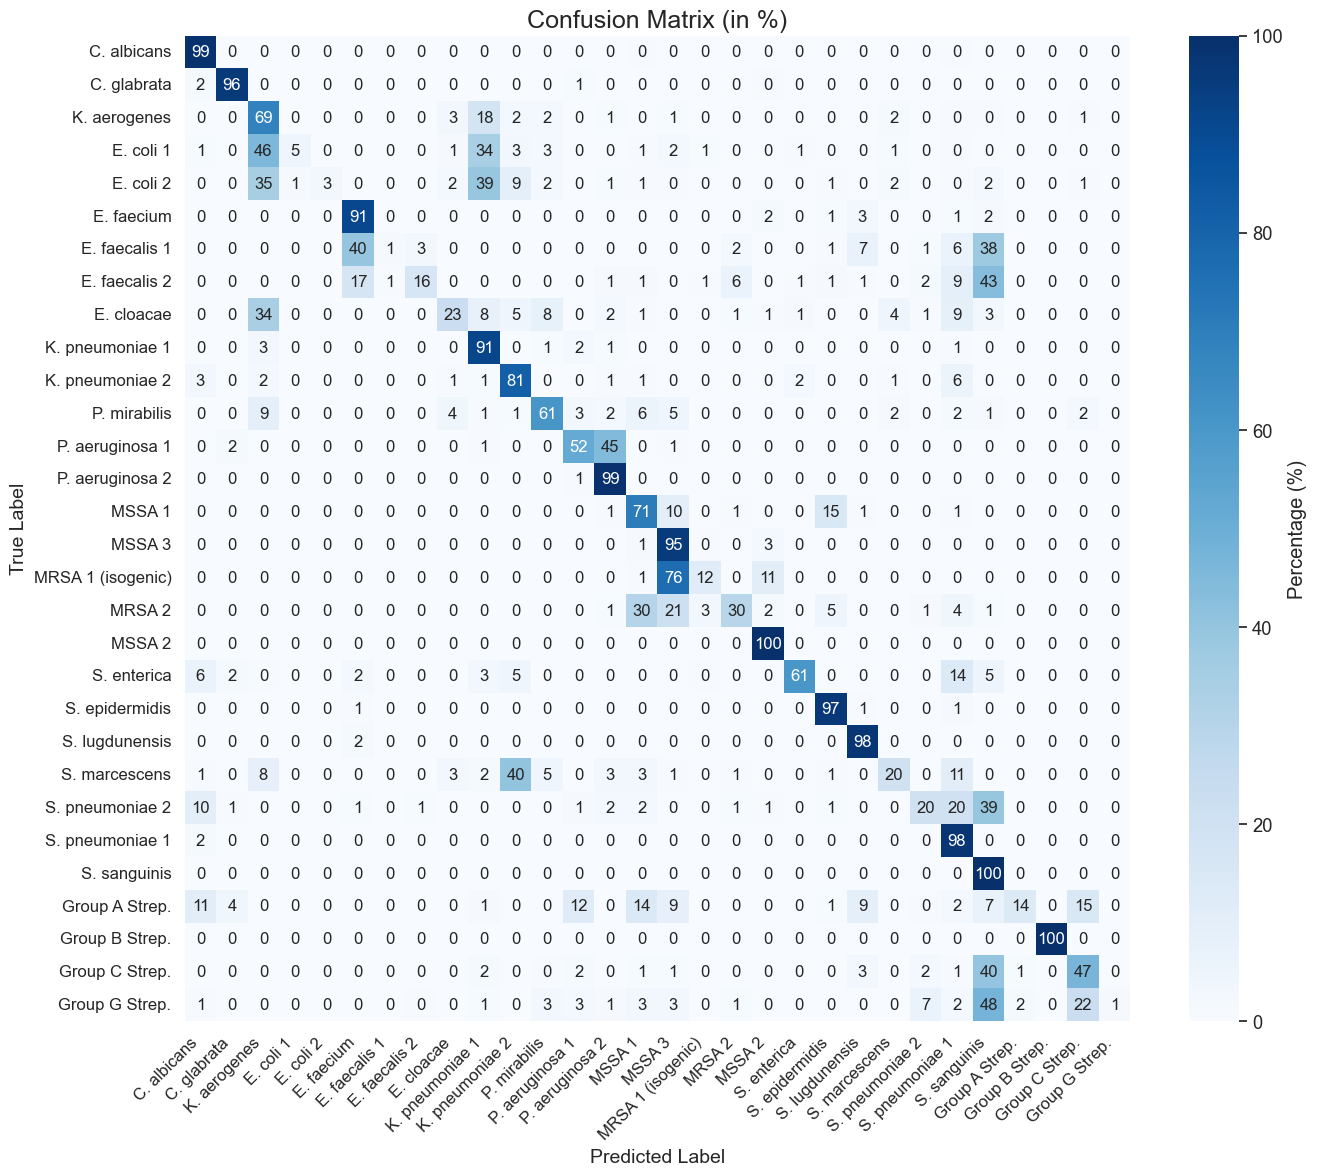

In [15]:
# Convert labels to binary format for PLS-DA
lb = LabelBinarizer()
Y_binarized = lb.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binarized, test_size=0.3, random_state=42)

# Apply PLS-DA with a specified number of components
pls_da = PLSRegression(n_components=10)  # Adjust n_components as needed
pls_da.fit(X_train, Y_train)

# Predict on the test set
Y_pred = pls_da.predict(X_test)

# Convert predictions back to class labels by choosing the class with the highest probability
y_pred_labels = lb.inverse_transform(Y_pred)

# Convert Y_test back to class labels
y_test_labels = lb.inverse_transform(Y_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Convert the confusion matrix to percentages
conf_matrix_percent = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

# Get the labels from STRAINS
labels = [STRAINS[i] for i in range(len(STRAINS))]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(14, 12)) 
sns.set(font_scale=1.2)

heatmap = sns.heatmap(conf_matrix_percent, annot=True, fmt=".0f", cmap="Blues", 
                      xticklabels=labels, yticklabels=labels, 
                      annot_kws={"size": 12}, cbar_kws={'label': 'Percentage (%)'})  


plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (in %)', fontsize=18)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()